In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
#import matplotlib.pyplot as plt
import os

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6
from apyori import apriori


# CSV data file is read by pandas library
## To check the missing values in each column

In [5]:
sales = pd.read_csv('data.csv')
sales.isna().sum()

TRANSACTION_DT          0
CUSTOMER_ID             0
AGE_GROUP           22362
GENDER              18638
PIN_CODE                0
PRODUCT_SUBCLASS        0
PRODUCT_ID              0
AMOUNT                  0
SALES_PRICE             0
day                     0
month                   0
year                    0
TOTAL_PRICE             0
dtype: int64

## An overview of the Data

In [6]:
sales.head()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,GENDER,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,SALES_PRICE,day,month,year,TOTAL_PRICE
0,01/01/2000,1104905,45-49,M,115,110411,4.710000e+12,2,30,1,1,2000,60
1,01/01/2000,418683,45-49,F,115,120107,4.710000e+12,1,46,1,1,2000,46
2,01/01/2000,1057331,35-39,F,115,100407,4.710000e+12,2,166,1,1,2000,332
3,01/01/2000,1849332,45-49,F,Others,120108,4.710000e+12,1,38,1,1,2000,38
4,01/01/2000,1981995,50-54,M,115,100205,4.710000e+12,1,18,1,1,2000,18


## Number of Transactions

In [7]:
len(sales['TRANSACTION_DT'])

817741

## Number of Products

In [8]:
len(sales['PRODUCT_SUBCLASS'].unique())

2012

## Number of Customers 

In [9]:
len(sales['CUSTOMER_ID'].unique())

32266

## Data Preprocessing to which we have already read the preprocessed data. this is commented code. 

## After Preprocessing of data, import monthwise CSV file for months analysis
## an overview of data

In [45]:
months_data = pd.read_csv('month_sales.csv')
months_data.head()

,TRANSACTION_DT,TOTAL_SALES
0,01/01/2000,225614.0
1,02/01/2000,4259104.0
2,03/01/2000,6293338.0
3,04/01/2000,2405290.0
4,05/01/2000,3107008.0


## Trend analysis of data 

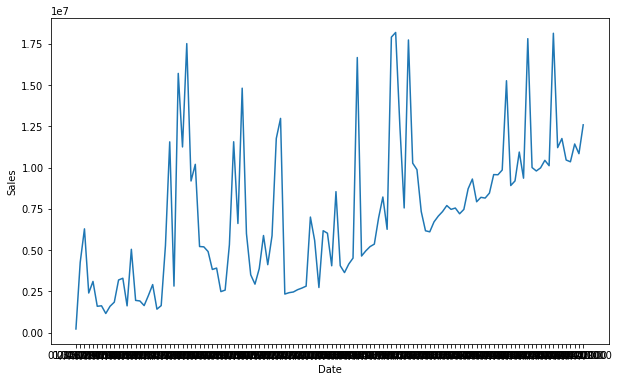

In [46]:
indexed_Data = months_data.set_index(['TRANSACTION_DT'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot(indexed_Data)

# Day, Month, Product, and Age_Group Wise Sales analysis

In [47]:
sales_day = pd.DataFrame()
sales_month = pd.DataFrame()
sales_product = pd.DataFrame()
sales_age = pd.DataFrame()
sales_per_product = pd.DataFrame()

## Sort the data in descending order to analyse minimum and maximum sales

In [48]:
months_data.sort_values('TOTAL_SALES', axis=0,ascending=False)

,TRANSACTION_DT,TOTAL_SALES
75,17/03/2000,18194004.67
112,23/04/2000,18146025.67
74,16/03/2000,17911458.67
106,17/04/2000,17818946.67
78,20/03/2000,17739995.67
...,...,...
5,06/01/2000,1601626.00
8,09/01/2000,1599962.00
19,20/01/2000,1426069.00
7,08/01/2000,1163161.00


## Export Monthwise sales to local CSV file for dashboard 

## Day wise sales price
### Data saved to DataFrame and imported to CSV file

In [49]:
sales_day['date'] = sales['TRANSACTION_DT']
sales_day['TOTAL_PRICE'] = sales['TOTAL_PRICE']
day_wise = sales_day.groupby(['date']).sum()
day_wise = months_data.sort_values('TOTAL_SALES', axis=0)
#day_wise.to_csv (r'CSV_files/Daily_sales.csv', index = False, header=True)
day_wise

,TRANSACTION_DT,TOTAL_SALES
0,01/01/2000,225614.00
7,08/01/2000,1163161.00
19,20/01/2000,1426069.00
8,09/01/2000,1599962.00
5,06/01/2000,1601626.00
...,...,...
78,20/03/2000,17739995.67
106,17/04/2000,17818946.67
74,16/03/2000,17911458.67
112,23/04/2000,18146025.67


## Products count each day and sales sum of each product

In [50]:
sales_product['product'] = sales['PRODUCT_SUBCLASS']
sales_product['date'] = sales['TRANSACTION_DT']
product_count = sales_product.groupby(['date']).count()
product_count

,product
date,
01/01/2000,1229
01/02/2000,4958
01/03/2000,11321
01/04/2000,4283
02/01/2000,7667
...,...
29/02/2000,16721
29/03/2000,4781
30/01/2000,7050


## Sales of Each Product in descending order

In [51]:
sales_per_product['product'] = sales['PRODUCT_SUBCLASS']
sales_per_product['sales'] = sales['TOTAL_PRICE']

s_p_product = sales_per_product.groupby(['product']).sum()
s_p_product = s_p_product.sort_values('sales', axis=0, ascending=False)
s_p_product

,sales
product,
100516,358793376
560402,162689294
100508,54188934
560201,31431473
500201,12469167
...,...
550718,62
520434,49
500513,45


# Number of Transactions by each customer

### Customers with highest number of transactions/orders are more loyal to the supermarket

In [52]:
cust_df = pd.DataFrame()
cust_df['cust_id'] = sales['CUSTOMER_ID']
cust_df['sales_price'] = sales['TOTAL_PRICE']
cust_sum = cust_df.groupby(['cust_id']).sum()
cust_count = cust_df.groupby(['cust_id']).count()

cust_sum = cust_sum.sort_values('sales_price', axis=0, ascending=False)
cust_sum 

,sales_price
cust_id,
1622362,355221564
2123851,17797777
2120829,17795024
1970777,14880612
2134819,14843035
...,...
1495300,9
2072784,9
2159331,9


In [53]:
cust_count = cust_count.sort_values('sales_price', axis=0, ascending=False)
cust_count

,sales_price
cust_id,
20459,1246
2112589,879
2112596,822
2113579,776
1847994,754
...,...
926430,1
924689,1
2057941,1


## customer transaction count and sales sum imported to CSV file for dashbaord

# Customer Sale Analysis from the Age Group

In [54]:
age_group_count = sales.groupby('AGE_GROUP').agg({'TOTAL_PRICE': ['count']}).round(0)
age_group_sum = sales.groupby('AGE_GROUP').agg({'TOTAL_PRICE': ['sum']}).round(0)

#age_group_count.to_csv (r'Project_CSV/Age_group_count.csv', index = True, header=True) 
#age_group_sum.to_csv (r'Project_CSV/Age_group_sum.csv', index = True, header=True) 

age_group_count.style.highlight_max()


,TOTAL_PRICE
,count
AGE_GROUP,
25-29,66432
30-34,140805
35-39,181213
40-44,151023
45-49,99719
50-54,53719
55-59,24743
60-64,20302


In [55]:
age_group_sum.style.highlight_max()


,TOTAL_PRICE
,sum
AGE_GROUP,
25-29,103926618
30-34,50257739
35-39,130874697
40-44,58045887
45-49,39714373
50-54,16855194
55-59,23073266
60-64,12634072


# Customer Analysis From the Gender

### from this analysis Male has less amount of transaction than female but has more Sales.

In [56]:
gender_analysis =sales.groupby('GENDER').agg({'TOTAL_PRICE': ['count', 'sum']}).round(0)
#gender_analysis.to_csv (r'Project_CSV/Gender.csv', index = True, header=True) 

gender_analysis.style.highlight_max()

# Orders in Date sequence 

### count of the orders and sum of total price each day

In [57]:
orders_sum_df = pd.DataFrame()
orders_sum_df = sales.groupby('TRANSACTION_DT').agg({'TOTAL_PRICE': ['sum']}).round(0)

orders_count_df = pd.DataFrame()
orders_count_df = sales.groupby('TRANSACTION_DT').agg({'TOTAL_PRICE': ['count']}).round(0)

#orders_sum_df.to_csv (r'Project_CSV/Orders_Sum.csv', index = True, header=True) 
#orders_count_df.to_csv (r'Project_CSV/Orders_Count.csv', index = True, header=True) 


In [58]:
sales

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,GENDER,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,SALES_PRICE,day,month,year,TOTAL_PRICE
0,01/01/2000,1104905,45-49,M,115,110411,4.710000e+12,2,30,1,1,2000,60
1,01/01/2000,418683,45-49,F,115,120107,4.710000e+12,1,46,1,1,2000,46
2,01/01/2000,1057331,35-39,F,115,100407,4.710000e+12,2,166,1,1,2000,332
3,01/01/2000,1849332,45-49,F,Others,120108,4.710000e+12,1,38,1,1,2000,38
4,01/01/2000,1981995,50-54,M,115,100205,4.710000e+12,1,18,1,1,2000,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
817736,28/04/2000,312790,35-39,F,114,530501,4.710000e+12,2,118,28,4,2000,236
817737,28/04/2000,57486,40-44,M,115,530209,4.710000e+12,1,55,28,4,2000,55
817738,28/04/2000,733526,>65,M,Unknown,510539,4.720000e+12,1,115,28,4,2000,115
817739,28/04/2000,173704,45-49,M,115,520457,4.710000e+12,1,96,28,4,2000,96


In [59]:
cust_df = pd.DataFrame()
cust_df['CUSTOMER_ID'] = sales['CUSTOMER_ID']
cust_df['TOTAL_PRICE'] = sales['TOTAL_PRICE']
cust_sum_df = cust_df.groupby(['CUSTOMER_ID']).sum()
cust_sum_sorted_df = cust_sum_df.sort_values('TOTAL_PRICE', axis=0,ascending=False)
#cust_sum_sorted_df.to_csv (r'Project_CSV/cust_sum_sorted_df.csv', index = True, header=True) 
cust_sum_sorted_df.head().style.highlight_max()

,TOTAL_PRICE
CUSTOMER_ID,
1622362,355221564
2123851,17797777
2120829,17795024
1970777,14880612
2134819,14843035


## Total Number of Products

In [60]:
prod=sales['PRODUCT_SUBCLASS'].unique()
len(prod)

2012

In [61]:
product_sum_df = pd.DataFrame()
product_sum_df = sales.groupby('PRODUCT_SUBCLASS').agg({'TOTAL_PRICE': ['sum']}).round(0)
#product_sum_df.to_csv (r'Project_CSV/product_sum_df.csv', index = True, header=True) 

product_count_df = pd.DataFrame()
product_count_df = sales.groupby('PRODUCT_SUBCLASS').agg({'TOTAL_PRICE': ['count']}).round(0)
#product_count_df.to_csv (r'Project_CSV/product_count_df.csv', index = True, header=True) 



# For seasonality, find the products at maximum sales day.
#### find the max sales
#### find the day and month
#### Get all the products on the same day
#### Get the total count of products


In [62]:
sales.head()
max_sale = months_data['TOTAL_SALES'].max()

In [63]:
s_filter = months_data['TOTAL_SALES'] == max_sale
dt = months_data[s_filter]
s_date=dt['TRANSACTION_DT']
s_date = list(s_date)
s_date[0]

'17/03/2000'

In [64]:
d_filter = sales['TRANSACTION_DT'] == max_sale

In [65]:
d_filter = sales['TRANSACTION_DT'] == s_date[0]

In [66]:
s_max = sales[d_filter]
s_max.head()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,GENDER,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,SALES_PRICE,day,month,year,TOTAL_PRICE
482762,17/03/2000,740203,50-54,M,115,530302,4.710000e+12,1,33,17,3,2000,33
482763,17/03/2000,1034561,40-44,F,115,100414,4.710000e+12,2,238,17,3,2000,476
482764,17/03/2000,186339,40-44,M,115,130316,4.710000e+12,3,219,17,3,2000,657
482765,17/03/2000,40242,30-34,M,115,500303,4.710000e+12,1,35,17,3,2000,35
482766,17/03/2000,1359145,>65,F,221,100205,4.960000e+12,1,55,17,3,2000,55


## Products with transaction count on the max sales day

In [67]:
prod_sales = pd.DataFrame()
prod_sales['PRODUCT'] = s_max['PRODUCT_SUBCLASS']
p_count = prod_sales['PRODUCT'].value_counts()
prod_count = pd.DataFrame(p_count)
prod_count.head()

,PRODUCT
500201,237
100205,166
110411,130
100505,118
110217,103


## Customer with Transaction count on the max sales day

In [68]:
cust_sales = pd.DataFrame()
cust_sales['CUSTOMER_ID'] = s_max['CUSTOMER_ID']
c_count = cust_sales['CUSTOMER_ID'].value_counts()
cust_count = pd.DataFrame(c_count)
cust_count.head()

,CUSTOMER_ID
1941814,102
1514377,65
2100432,53
1698534,52
1328165,51


## Saving DataFrames to CSV for PowerBI Dashbaord

In [69]:
#prod_count.to_csv (r'Project_CSV/product_count_max_sales_day.csv', index = True, header=True) 

In [70]:
#cust_count.to_csv (r'Project_CSV/Customer_count_max_sales_day.csv', index = True, header=True) 

# Time Series Analysis Model

In [74]:
m_data = pd.read_csv('month_sales.csv')
m_data.head()

,TRANSACTION_DT,TOTAL_SALES
0,01/01/2000,225614.0
1,02/01/2000,4259104.0
2,03/01/2000,6293338.0
3,04/01/2000,2405290.0
4,05/01/2000,3107008.0


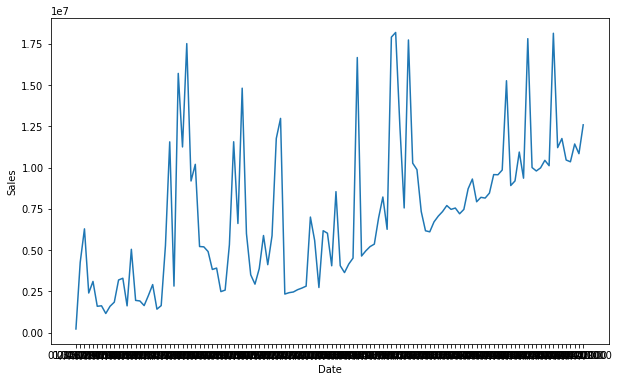

In [75]:
ind_Data = m_data.set_index(['TRANSACTION_DT'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot(ind_Data)

In [76]:
rolling_mean = ind_Data.rolling(window=10).mean()
rolling_std = ind_Data.rolling(window=10).std()
print(rolling_mean, rolling_std)

                 TOTAL_SALES
TRANSACTION_DT              
01/01/2000               NaN
02/01/2000               NaN
03/01/2000               NaN
04/01/2000               NaN
05/01/2000               NaN
...                      ...
26/04/2000      1.197750e+07
27/04/2000      1.123132e+07
28/04/2000      1.137413e+07
29/04/2000      1.147890e+07
30/04/2000      1.173965e+07

[120 rows x 1 columns]                  TOTAL_SALES
TRANSACTION_DT              
01/01/2000               NaN
02/01/2000               NaN
03/01/2000               NaN
04/01/2000               NaN
05/01/2000               NaN
...                      ...
26/04/2000      3.222429e+06
27/04/2000      2.503144e+06
28/04/2000      2.466037e+06
29/04/2000      2.413451e+06
30/04/2000      2.375187e+06

[120 rows x 1 columns]


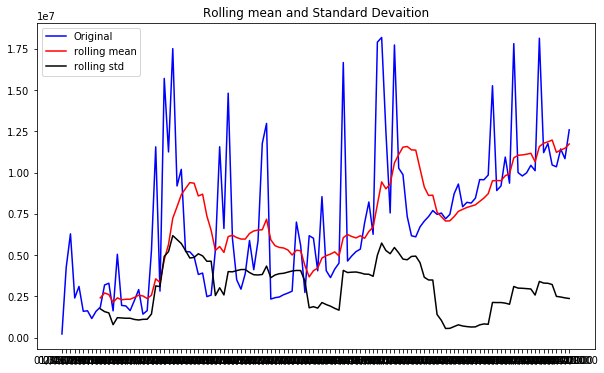

In [77]:
orig = plt.plot(ind_Data, color='blue', label='Original')
mean = plt.plot(rolling_mean, color='red', label='rolling mean')
std = plt.plot(rolling_std, color='black', label='rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and Standard Devaition')
plt.show(block=False)

# Performing Dickey-Fuller Test

In [78]:
from statsmodels.tsa.stattools import adfuller
print("Results of the Dickey-Fuller Test:")
dftest = adfuller(ind_Data['TOTAL_SALES'],autolag='AIC')

df_output = pd.Series(dftest[0:4], index=['Test Statistic','P-value', 'Number of lag used', 'Number of Observation Used'])
for key, value in dftest[4].items():
    df_output['critical value (%s)' %key]= value
print(df_output)

Results of the Dickey-Fuller Test:
Test Statistic                 -3.702955
P-value                         0.004072
Number of lag used              1.000000
Number of Observation Used    118.000000
critical value (1%)            -3.487022
critical value (5%)            -2.886363
critical value (10%)           -2.580009
dtype: float64


# Estimation of the Trends

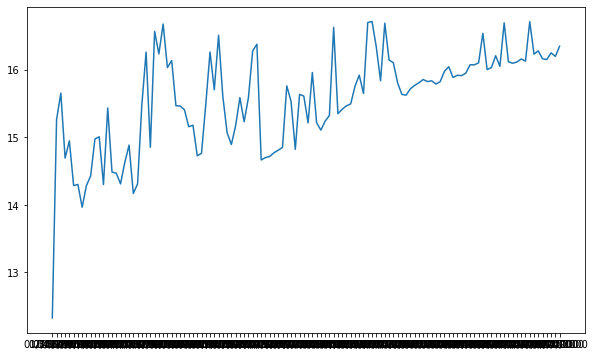

In [79]:
indexed_Dataset_log_Scale = np.log(ind_Data)
plt.plot(indexed_Dataset_log_Scale)

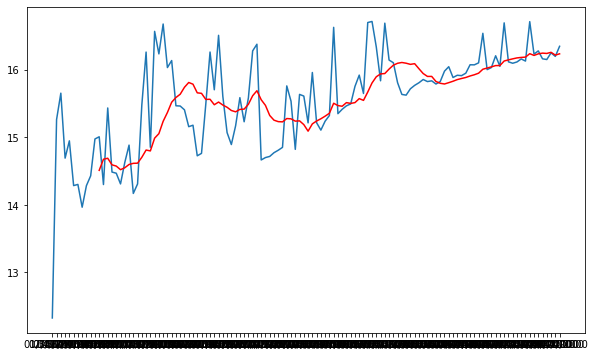

In [80]:
moving_Average = indexed_Dataset_log_Scale.rolling(window=12).mean()
movingstd = indexed_Dataset_log_Scale.rolling(window=12).std()
plt.plot(indexed_Dataset_log_Scale)
plt.plot(moving_Average, color='red')

In [81]:
dataset_Log_Scale_Minus_Moving_Average = indexed_Dataset_log_Scale - moving_Average
dataset_Log_Scale_Minus_Moving_Average.head(12)

#dropping NaN values
dataset_Log_Scale_Minus_Moving_Average.dropna(inplace=True)
dataset_Log_Scale_Minus_Moving_Average.head(10)

,TOTAL_SALES
TRANSACTION_DT,
12/01/2000,0.496899
13/01/2000,-0.374850
14/01/2000,0.744376
15/01/2000,-0.106924
16/01/2000,-0.105460
17/01/2000,-0.210699
18/01/2000,0.077451
19/01/2000,0.286659
20/01/2000,-0.445748


In [82]:

from statsmodels.tsa.stattools import adfuller
def test_stationarity(time_series):
    moving_average = time_series.rolling(window=12).mean()
    moving_std = time_series.rolling(window=12).std()
    
    orig1 = plt.plot(time_series, color='blue', label='Original')
    mean1 = plt.plot(moving_average, color='red', label='Rolling Mean')
    std1 = plt.plot(moving_std, color='black', label='Rolling STD')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print('Result of Dickey-Fuller Test')
    dftest = adfuller(time_series['TOTAL_SALES'], autolag='AIC')
    df_output = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'Number Of lags Used', 'Number of observation used'])
    for key, value in dftest[4].items():
        df_output['critical value (%s)' %key] =value
    print(df_output)
                                             

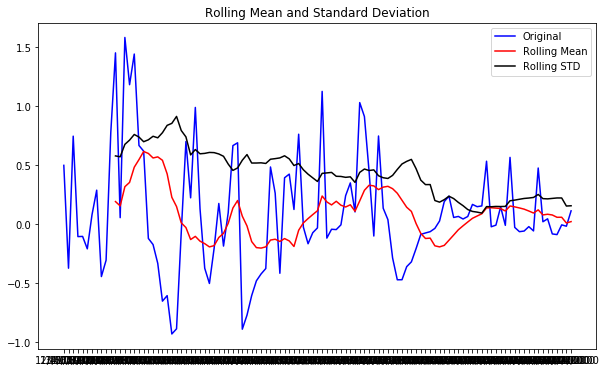

Result of Dickey-Fuller Test
Test Statistic               -6.388292e+00
p-value                       2.137014e-08
Number Of lags Used           0.000000e+00
Number of observation used    1.080000e+02
critical value (1%)          -3.492401e+00
critical value (5%)          -2.888697e+00
critical value (10%)         -2.581255e+00
dtype: float64


In [83]:
test_stationarity(dataset_Log_Scale_Minus_Moving_Average)

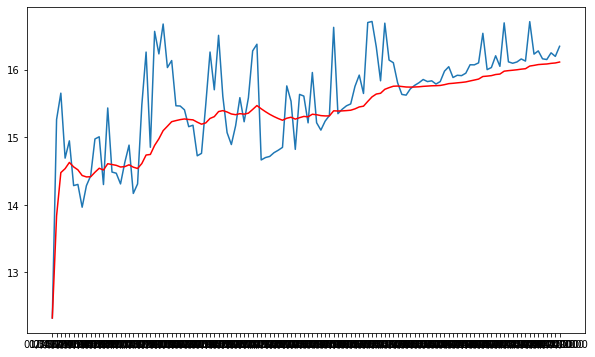

In [84]:
exponential_Decay_Weighted_Average = indexed_Dataset_log_Scale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexed_Dataset_log_Scale)
plt.plot(exponential_Decay_Weighted_Average, color='red')

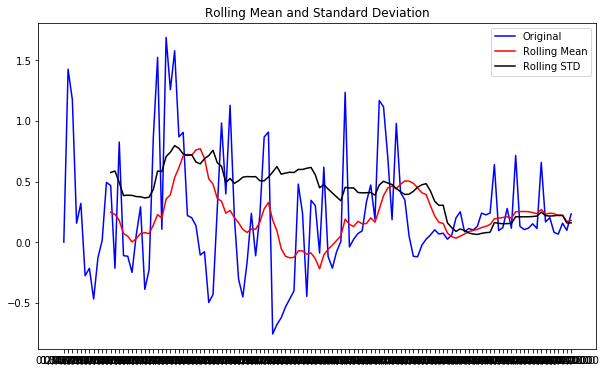

Result of Dickey-Fuller Test
Test Statistic               -6.873385e+00
p-value                       1.495751e-09
Number Of lags Used           0.000000e+00
Number of observation used    1.190000e+02
critical value (1%)          -3.486535e+00
critical value (5%)          -2.886151e+00
critical value (10%)         -2.579896e+00
dtype: float64


In [85]:
dataset_LogScale_Minus_MovingAverage_Exponential_Decay_Average = indexed_Dataset_log_Scale - exponential_Decay_Weighted_Average
test_stationarity(dataset_LogScale_Minus_MovingAverage_Exponential_Decay_Average)


# when the data is Stationary then we shift the indexed_Dataset_log_Scale

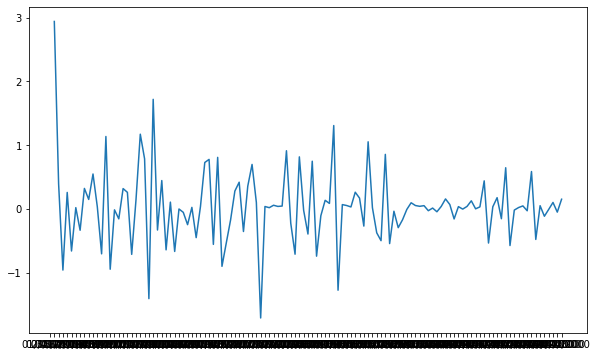

In [86]:
dataset_Log_Diff_Shifting = indexed_Dataset_log_Scale - indexed_Dataset_log_Scale.shift()
plt.plot(dataset_Log_Diff_Shifting)

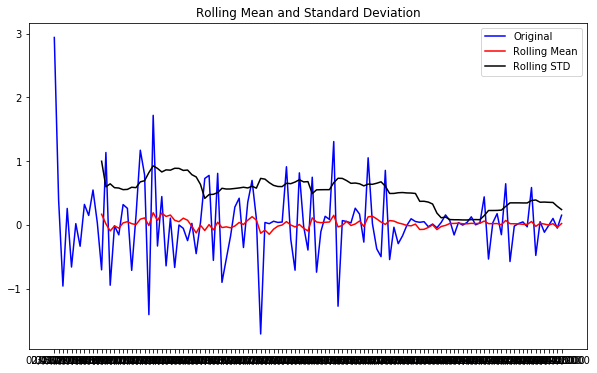

Result of Dickey-Fuller Test
Test Statistic                 -5.304539
p-value                         0.000005
Number Of lags Used             9.000000
Number of observation used    109.000000
critical value (1%)            -3.491818
critical value (5%)            -2.888444
critical value (10%)           -2.581120
dtype: float64


In [87]:
dataset_Log_Diff_Shifting.dropna(inplace=True)
test_stationarity(dataset_Log_Diff_Shifting)

# ACF and PACF plots

F:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


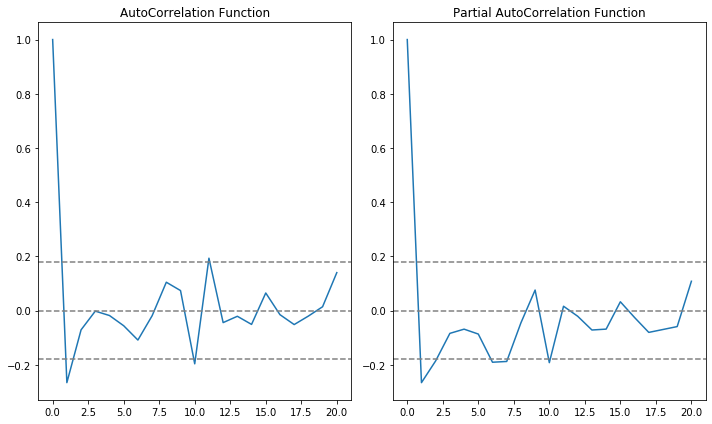

In [88]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(dataset_Log_Diff_Shifting, nlags=20)
lag_pacf = pacf(dataset_Log_Diff_Shifting, nlags=20, method='ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(dataset_Log_Diff_Shifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataset_Log_Diff_Shifting)), linestyle='--', color='gray')
plt.title('AutoCorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(dataset_Log_Diff_Shifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataset_Log_Diff_Shifting)), linestyle='--', color='gray')
plt.title('Partial AutoCorrelation Function')
plt.tight_layout()

F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Ploting AR Model


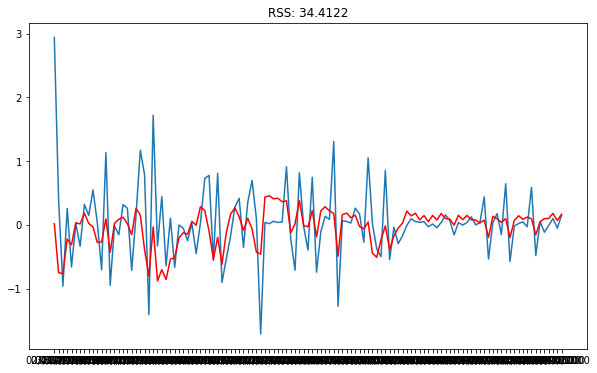

In [89]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(indexed_Dataset_log_Scale, order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(dataset_Log_Diff_Shifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-dataset_Log_Diff_Shifting['TOTAL_SALES'])**2))
print('Ploting AR Model')

F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Ploting MA Model with order (2,1,0)


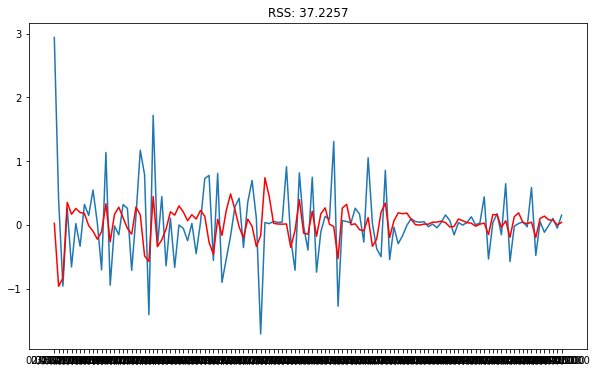

In [90]:
#MA Model
model = ARIMA(indexed_Dataset_log_Scale, order=(2,1,0))
results_MA = model.fit(disp=-1)
plt.plot(dataset_Log_Diff_Shifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-dataset_Log_Diff_Shifting['TOTAL_SALES'])**2))
print('Ploting MA Model with order (2,1,0)')

F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Ploting MA Model with order (2,1,2)


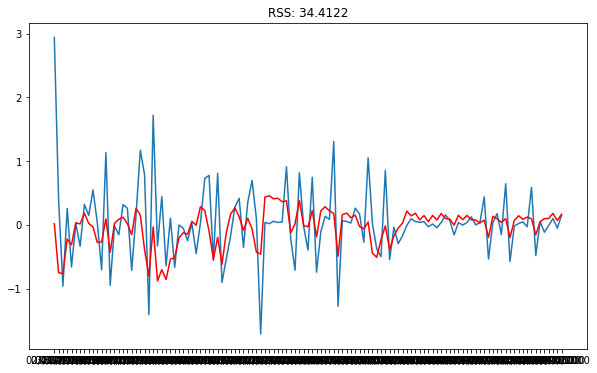

In [91]:
#MA Model
model = ARIMA(indexed_Dataset_log_Scale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(dataset_Log_Diff_Shifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-dataset_Log_Diff_Shifting['TOTAL_SALES'])**2))
print('Ploting MA Model with order (2,1,2)')

In [92]:
predictions_ARIMA_diff =pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

TRANSACTION_DT
02/01/2000    0.014930
03/01/2000   -0.751363
04/01/2000   -0.766217
05/01/2000   -0.224254
06/01/2000   -0.315583
dtype: float64


# Find the Cumulative Sum

In [93]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

TRANSACTION_DT
02/01/2000    0.014930
03/01/2000   -0.736433
04/01/2000   -1.502651
05/01/2000   -1.726904
06/01/2000   -2.042488
dtype: float64


In [94]:
predictions_ARIMA_log = pd.Series(indexed_Dataset_log_Scale['TOTAL_SALES'].ix[0],index=indexed_Dataset_log_Scale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


TRANSACTION_DT
01/01/2000    12.326581
01/02/2000     5.168079
01/03/2000     6.187651
01/04/2000     6.372220
02/01/2000    12.341511
                ...    
29/04/2000     8.155482
30/01/2000     5.374485
30/03/2000     6.152087
30/04/2000     8.320062
31/03/2000     6.297783
Length: 120, dtype: float64

In [96]:
p_arima = pd.read_csv('predictions_ARIMA_log_1.csv')
pred_arima=p_arima['pred']
predict_ARIMA = np.exp(pred_arima)
plt.plot(ind_Data)
plt.plot(predict_ARIMA)

FileNotFoundError: [Errno 2] File b'predictions_ARIMA_log_1.csv' does not exist: b'predictions_ARIMA_log_1.csv'

TRANSACTION_DT
01/01/2000    225614.000000
01/02/2000       175.577266
01/03/2000       486.701514
01/04/2000       585.355770
02/01/2000    229007.635735
                  ...      
29/04/2000      3482.418331
30/01/2000       215.828714
30/03/2000       469.696787
30/04/2000      4105.413529
31/03/2000       543.365815
Length: 120, dtype: float64

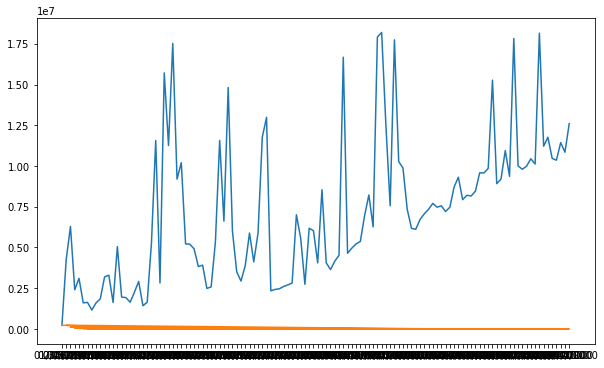

In [97]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ind_Data)
plt.plot(predictions_ARIMA)
predictions_ARIMA

F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


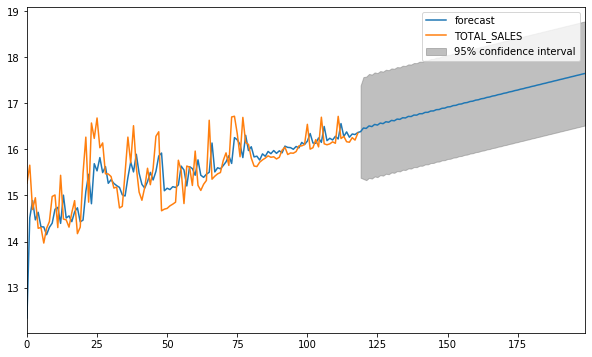

In [98]:
results_ARIMA.plot_predict(1,200)
x = results_ARIMA.forecast(steps=300)

In [99]:
x[1]

array([0.51071152, 0.5636112 , 0.57258699, 0.57499821, 0.57526703,
       0.57544615, 0.57544674, 0.57548097, 0.57548575, 0.57550242,
       0.57550903, 0.57552137, 0.57552736, 0.57553763, 0.57554265,
       0.57555143, 0.57555554, 0.57556313, 0.57556647, 0.57557303,
       0.57557574, 0.57558143, 0.57558361, 0.57558856, 0.5755903 ,
       0.57559461, 0.57559601, 0.57559977, 0.57560087, 0.57560417,
       0.57560503, 0.57560792, 0.57560859, 0.57561114, 0.57561166,
       0.5756139 , 0.57561429, 0.57561628, 0.57561657, 0.57561834,
       0.57561855, 0.57562012, 0.57562027, 0.57562168, 0.57562178,
       0.57562304, 0.57562311, 0.57562424, 0.57562429, 0.57562531,
       0.57562533, 0.57562626, 0.57562627, 0.57562711, 0.57562711,
       0.57562788, 0.57562788, 0.57562858, 0.57562858, 0.57562923,
       0.57562923, 0.57562982, 0.57562983, 0.57563038, 0.57563039,
       0.5756309 , 0.57563091, 0.57563139, 0.57563141, 0.57563186,
       0.57563189, 0.5756323 , 0.57563234, 0.57563273, 0.57563

# Data Pre-Processing for Approri Algorithm

In [100]:
sales.head()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,GENDER,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,SALES_PRICE,day,month,year,TOTAL_PRICE
0,01/01/2000,1104905,45-49,M,115,110411,4.710000e+12,2,30,1,1,2000,60
1,01/01/2000,418683,45-49,F,115,120107,4.710000e+12,1,46,1,1,2000,46
2,01/01/2000,1057331,35-39,F,115,100407,4.710000e+12,2,166,1,1,2000,332
3,01/01/2000,1849332,45-49,F,Others,120108,4.710000e+12,1,38,1,1,2000,38
4,01/01/2000,1981995,50-54,M,115,100205,4.710000e+12,1,18,1,1,2000,18


In [101]:
data2 = pd.DataFrame()
data2['CUSTOMER_ID'] = sales['CUSTOMER_ID']
data2['PRODUCT_SUBCLASS'] = sales['PRODUCT_SUBCLASS']

#filt1 = data2['CUSTOMER_ID'] == 1104905
#prod=data2[filt1]


### This script was used to get the values and make data for approri algorithm

In [102]:
unique_cust = pd.DataFrame()
prod_cls = pd.DataFrame()
unique_cust = sales['CUSTOMER_ID'].unique()
unique_cust[0]
unique_cust_len = len(unique_cust)
unique_cust_len
cust_sample = unique_cust[:20]
prod_list = []

for i in range(0,20):
    cust_id = str(cust_sample[i])
    filt1 = data2['CUSTOMER_ID'] == cust_sample[i]
    prod=data2[filt1]
    prod_subclass = prod['PRODUCT_SUBCLASS'].unique()
    prod_subclass_sorted = prod_subclass.sort()
    prod_df = pd.DataFrame(prod_subclass)
    prod_list = prod_list + list(prod_subclass)
    #prod_cls[cust_id] = prod_df
    #prod_df.to_csv (r'Customers_files/customer '+cust_id+'.csv', index = False, header=True) 
     

In [103]:
prod_lst_df = pd.DataFrame(prod_list)
aa=prod_lst_df[0].unique()
aa.sort()
products_df = pd.DataFrame(aa)
#products_df.to_csv (r'Customers_files/total_producs.csv', index = False, header=True) 
     

## Excel was used for data preprocessing to clean and make reliable dataset for aprori algorithm

In [110]:
data3 = pd.read_csv('apriori_data.csv')

In [111]:
data3.head()

,120105,130315,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,100113,100304,100511,130204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,110117,110401,110411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110401,120109,130201,130204.0,130206.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100218,100312,100314,100323.0,110117.0,110401.0,110403.0,110404.0,110504.0,110507.0,130207.0,130315.0,NaN,NaN,NaN,NaN,NaN
4,110118,110401,110506,130106.0,130204.0,130206.0,130207.0,130315.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
#data3.to_csv(r'aprori_data.csv', index = False, header=True)

In [113]:
aprori_data = pd.read_csv('apriori_data.csv', header=None)

In [114]:
aprori_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,120105,130315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100113,100304,100511.0,130204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110117,110401,110411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,110401,120109,130201.0,130204.0,130206.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100218,100312,100314.0,100323.0,110117.0,110401.0,110403.0,110404.0,110504.0,110507.0,130207.0,130315.0,NaN,NaN,NaN,NaN,NaN


# Aprori Algorithm Data Preprocessing 

In [115]:
records = []
for i in range(0,4):
    records.append([str(aprori_data.values[i,j]) for j in range(0,11)])

In [116]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=5)
association_results = list(association_rules)


## Applying Apriori Algorithm, we determined the Rules or itemsets.

In [117]:
ar = pd.DataFrame(association_results)
ar.head()

,items,support,ordered_statistics
0,"(100113.0, 100304.0)",0.25,"[((100113.0), (100304.0), 1.0, 4.0), ((100304...."
1,"(100113.0, 100511.0)",0.25,"[((100113.0), (100511.0), 1.0, 4.0), ((100511...."
2,"(100304.0, 100511.0)",0.25,"[((100304.0), (100511.0), 1.0, 4.0), ((100511...."
3,"(110411.0, 110117.0)",0.25,"[((110117.0), (110411.0), 1.0, 4.0), ((110411...."
4,"(120105.0, 130315.0)",0.25,"[((120105.0), (130315.0), 1.0, 4.0), ((130315...."


In [118]:
itemset = pd.DataFrame()
itemset['itmes'] = ar['items']
itemset['support'] = ar['support']

In [119]:
#itemset.to_csv(r'itemsets.csv', index = False, header=True)

## This is the code of the project analysis are breifly discussed in the report and powerBI dashboard